#### Loading modules, Config, and Profiling

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import os

In [2]:
cwd = os.getcwd()
# print(cwd)

In [3]:
data = pd.read_csv("The Seattle Police Department (SPD) Crime Data.csv")
data.head(2)

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118


In [4]:
data.shape #almost a millions rows to start with before cleaning

(979713, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979713 entries, 0 to 979712
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Report Number           979713 non-null  object 
 1   Offense ID              979713 non-null  int64  
 2   Offense Start DateTime  978708 non-null  object 
 3   Offense End DateTime    543406 non-null  object 
 4   Report DateTime         979713 non-null  object 
 5   Group A B               979713 non-null  object 
 6   Crime Against Category  979713 non-null  object 
 7   Offense Parent Group    979713 non-null  object 
 8   Offense                 979713 non-null  object 
 9   Offense Code            979713 non-null  object 
 10  Precinct                979709 non-null  object 
 11  Sector                  979711 non-null  object 
 12  Beat                    979711 non-null  object 
 13  MCPP                    979713 non-null  object 
 14  100 Block Address   

In [ ]:
!pip install pandas_profiling
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(data, title="Police Report: Pandas Profiling Report", explorative=True)
profile.to_widgets() 
profile # I usually use write a few lines/a script for smaller datasets when exploring but given the size
        # I wanted to get a read on things before diving in fully

#### Data Wrangling / Cleaning

In [7]:
data.isnull().sum().sort_values(ascending=False) 

Offense End DateTime      436307
100 Block Address          39611
Offense Start DateTime      1005
Precinct                       4
Beat                           2
Sector                         2
Report Number                  0
Longitude                      0
MCPP                           0
Offense                        0
Offense Code                   0
Offense ID                     0
Offense Parent Group           0
Crime Against Category         0
Group A B                      0
Report DateTime                0
Latitude                       0
dtype: int64

In [8]:
end_pct = round(data[data['Offense End DateTime'].isnull()].shape[0] / data.shape[0] * 100, 2)
print(f"Percentage of End Datetime NaN values: {end_pct}%")
#nearly 45% of all Offense End DateTime values are NaN

Percentage of End Datetime NaN values: 44.53%


In [9]:
address_pct = round(data[data['100 Block Address'].isnull()].shape[0] / data.shape[0] * 100, 2)
print(f"Percentage of Street Address NaN values: {address_pct}%")
#only 4% of all Offense End DateTime values are NaN

Percentage of Street Address NaN values: 4.04%


In [ ]:
# there are 39611 incidents without an address - remove 
# same goes for any other missing data, like Start DateTime 
# there is no way to get an accurate Start DateTime

In [10]:
#Whether 'End Datetime' is of relevance also depends on what questions we're trying to answer
    # e.g. Do we care how long each crime lasted? Would this be import in learning police 
    #      response times and stopping criminal incidents? 
    
data.drop(['Offense End DateTime'], axis = 1, inplace = True) # removing column from dataframe
data.dropna(axis=0, inplace=True) # dropping remaining values that are NaN
data.isnull().sum()

Report Number             0
Offense ID                0
Offense Start DateTime    0
Report DateTime           0
Group A B                 0
Crime Against Category    0
Offense Parent Group      0
Offense                   0
Offense Code              0
Precinct                  0
Sector                    0
Beat                      0
MCPP                      0
100 Block Address         0
Longitude                 0
Latitude                  0
dtype: int64

In [11]:
data.duplicated().sum() # there are no duplicates present in the dataset 

0

In [12]:
data.columns = data.columns.str.replace(" ", "_").str.lower() #formatting column names for easier scripting 

In [13]:
data.head(2)

,report_number,offense_id,offense_start_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,beat,mcpp,100_block_address,longitude,latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118


Date and Time Adjustments

In [14]:
data['offense_date'] = data['offense_start_datetime'].apply(lambda x: x.split(" ")[0])
data['offense_time'] = data['offense_start_datetime'].apply(lambda x: x.split(" ")[1])

In [15]:
data['offense_date'] = pd.to_datetime(data.offense_date)
data['offense_month'] = data.offense_date.dt.month_name()
data['offense_dow'] = data.offense_date.dt.day_name()
data['offense_day_no'] = data.offense_date.dt.day_of_week
data['offense_year'] = data.offense_date.dt.year

In [16]:
data['offense_start_datetime'].str.split(" ")[1][1]

'08:00:00'

In [17]:
#hour of crime is denoted by AM and PM, so I'll have to change how I thought I was going to approach this
#this could be done with an np where as well - refactoring idea
def convert_to_24_hours(time): 
    '''converts AM/PM times to 24-clock'''
    if "PM" in time: 
        time = int(time.split(":")[0]) + 12 
    else: 
        time = int(time.split(":")[0])
    return time

def np_convert_to_24_hours(time)

In [20]:
data['offense_ampm'] = data['offense_start_datetime'].apply(lambda x: x.split(" ")[1:])
data['offense_ampm'] = data['offense_ampm'].apply(lambda x: " ".join(x))
data['offense_24hr'] = data['offense_ampm'].apply(lambda x: convert_to_24_hours(x))

In [31]:
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.

Street Address Adjustments

In [21]:
data.columns

Index(['report_number', 'offense_id', 'offense_start_datetime',
       'report_datetime', 'group_a_b', 'crime_against_category',
       'offense_parent_group', 'offense', 'offense_code', 'precinct', 'sector',
       'beat', 'mcpp', '100_block_address', 'longitude', 'latitude',
       'offense_date', 'offense_time', 'offense_month', 'offense_dow',
       'offense_day_no', 'offense_year', 'offense_ampm', 'offense_24hr'],
      dtype='object')

In [22]:
data["100_block_address"] = data["100_block_address"].apply(lambda x: x.replace("XX", "00"))
#replacing all blocked out address with "00" number of block for more granularity than just street address

data["street_address"] = data["100_block_address"].apply(lambda x: x.replace("BLOCK OF", ""))

In [ ]:
# plt.figure(figsize=(3, 3))
# sns.scatterplot(data=data, 
#                 x="latitude", 
#                 y="longitude")

# #should generate a more visible plot given coordinates - look into this further 

#### Exploratory Data Analysis 

Date and Time Visualizations 

In [23]:
data['DAY_OF_WEEK'] = pd.Categorical(data['offense_dow'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True) #converting to categorical variables for easier ordering on graphs 

In [24]:
data.head(2)

,report_number,offense_id,offense_start_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,...,offense_date,offense_time,offense_month,offense_dow,offense_day_no,offense_year,offense_ampm,offense_24hr,street_address,DAY_OF_WEEK
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,...,2020-02-05,10:10:00,February,Wednesday,2,2020,10:10:00 AM,10,3200 23RD AVE W,Wednesday
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,...,2020-02-03,08:00:00,February,Monday,0,2020,08:00:00 AM,8,6300 5TH AVE NE,Monday


Text(0.5, 1.0, 'Distribution of Criminal Incidents By Day of Week')

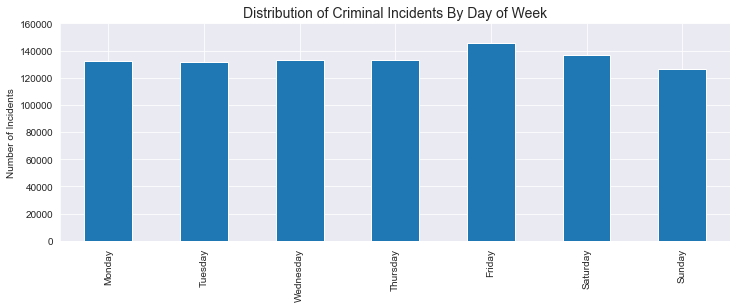

In [33]:
# ensuring that DOW is ordered vs. Friday coming before Tuesday because of it's ranking 
data.DAY_OF_WEEK.value_counts().sort_index().plot(kind="bar", figsize=(12, 4))
plt.ylabel("Number of Incidents")
plt.title("Distribution of Criminal Incidents By Day of Week", fontsize=14)

In [26]:
data['MONTH_OF_YEAR'] = pd.Categorical(data['offense_month'], categories=
    ["January", "February", "March", "April", "May", "June", "July", 
         "August", "September", "October", "November", "December"], 
    ordered=True) #converting months for easier ordering on graphs

Text(0.5, 1.0, 'Distribution of Criminal Incidents By Month')

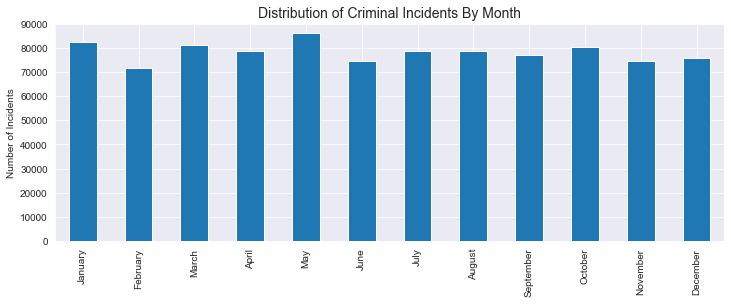

In [34]:
data.MONTH_OF_YEAR.value_counts().sort_index().plot(kind="bar", figsize=(12, 4))
plt.ylabel("Number of Incidents")
plt.title("Distribution of Criminal Incidents By Month", fontsize=14)

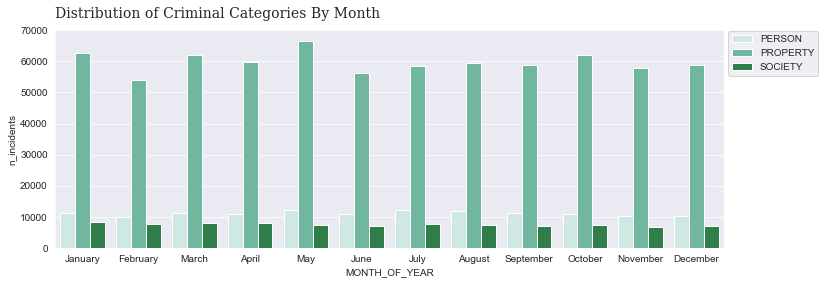

In [35]:
fig, ax = plt.subplots(figsize=(12, 4))
group1 = data.groupby(['MONTH_OF_YEAR', 'crime_against_category']).size().to_frame("n_incidents").reset_index()
sns.barplot(data=group1, x='MONTH_OF_YEAR', y='n_incidents', hue='crime_against_category', palette="BuGn")

ax.text(-0.5, 74000, "Distribution of Criminal Categories By Month", \
        {'font':'Serif', 'fontsize':14, 'fontweight':'medium'})
ax.legend(loc=(1.005, .79))

Text(0, 82500, 'Crime Heats Up Throughout the Day ')

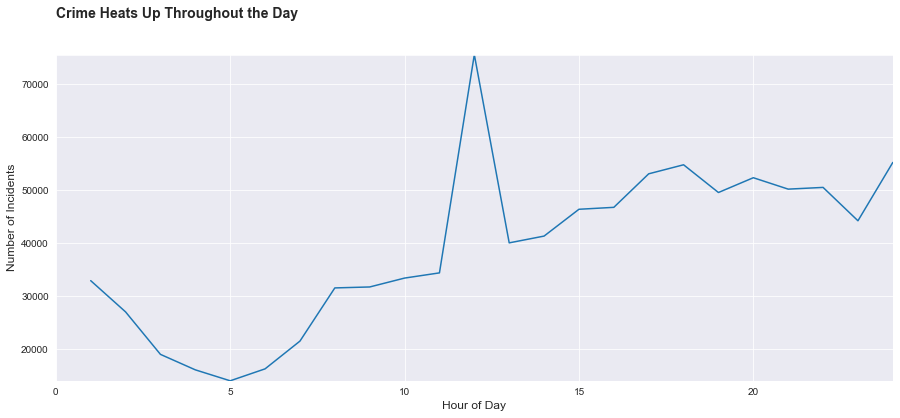

In [36]:
hour_group = data.groupby('offense_24hr').size().to_frame('n_incidents').reset_index()

fig, ax = plt.subplots(figsize=(15, 6))
sns.set_style('darkgrid')
sns.lineplot(data=hour_group, x='offense_24hr', y='n_incidents')
ax.margins(0)

plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Incidents", fontsize=12)
plt.xlim(0, 24)
ax.text(0, 82500, "Crime Heats Up Throughout the Day ", {'font':'Arial', 'fontweight':'bold', 'fontsize':14})

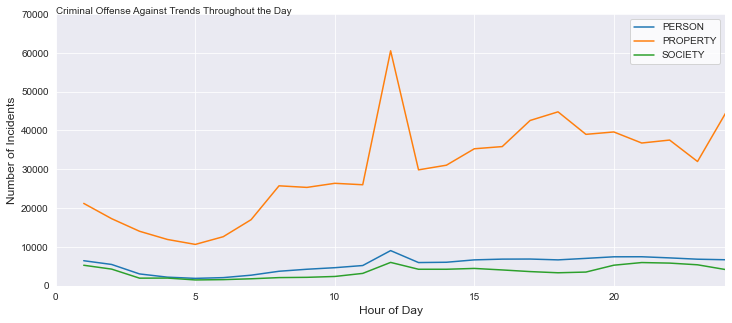

In [37]:
hour_cat_group = data.groupby(['offense_24hr', 'crime_against_category']).size().to_frame('n_incidents').reset_index()
fig, ax = plt.subplots(figsize=(12, 5))
sns.set_style('white')
sns.lineplot(data=hour_cat_group, x='offense_24hr', y='n_incidents', hue='crime_against_category')

plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Incidents", fontsize=12)
plt.xlim(0, 24)
ax.text(0, 70000, "Criminal Offense Against Trends Throughout the Day", {"fontsize":18, "fontweight":"bold", "font":"Arial"})

plt.legend(fontsize=10, fancybox=True)
sns.despine()

In [ ]:
data.columns

In [ ]:
#heatmap of hour of day, month of year and number of incidents 

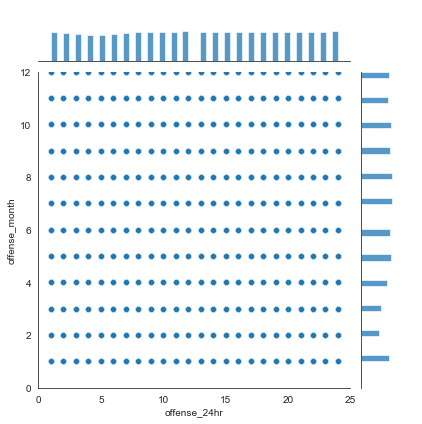

In [38]:
time_heatmap = data.groupby(['offense_date', 'offense_24hr']).size().to_frame('n_incidents').reset_index()
time_heatmap.sort_values('n_incidents', ascending=False) # there are hundreds of arrests per hour during certain times of the year 
time_heatmap['offense_month'] = (data['offense_date'].dt.month)
time_heatmap = time_heatmap.iloc[:, 1:]
g = sns.jointplot(data=time_heatmap, x="offense_24hr", y="offense_month");

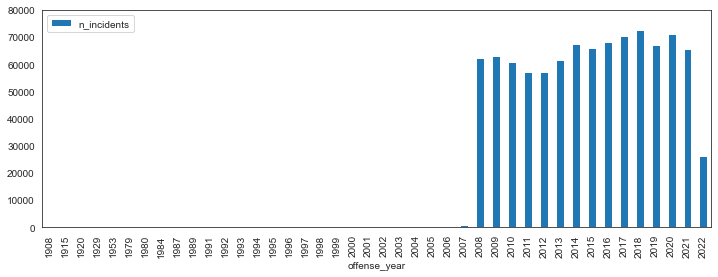

In [39]:
by_year = data.groupby(['offense_year']).size().to_frame("n_incidents").plot(kind="bar", figsize=(12, 4))

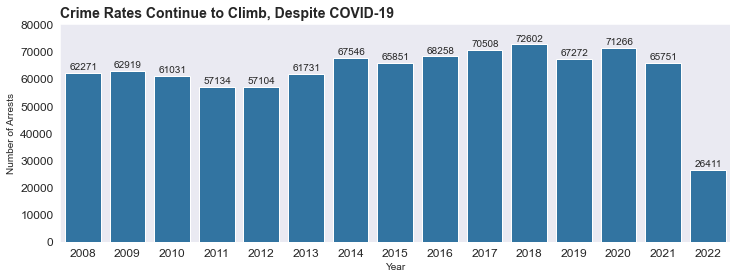

In [43]:
#it looks like crime has steadily increased since '08 in Seattle, with some exceptions 
# it's also clear that the dataset has values preceeding 2008 that will need to be taken care of 

by_year = data.groupby(['offense_year']).size().to_frame('n_incidents').reset_index() 
by_year = by_year[by_year['offense_year'] >= 2008]

fig, ax = plt.subplots(figsize=(12, 4)) 
sns.set_style('dark')
sns.barplot(data=by_year, x="offense_year", y="n_incidents", color="tab:blue")
plt.xlabel("Year")
plt.ylabel("Number of Arrests")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for p in ax.patches: 
    x = p.get_x() + p.get_width() - 0.7
    y = p.get_y() + p.get_height() + 1250
    value = "{}".format(p.get_height())
    value = int(float(value))
    ax.text(x, y, value)

ax.text(-0.5, 82500, "Crime Rates Continue to Climb, Despite COVID-19", 
       {"font":"arial", "fontweight":"bold", "fontsize":14});

In [44]:
data[data['offense_year'] < 2000][:3]

,report_number,offense_id,offense_start_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,...,offense_time,offense_month,offense_dow,offense_day_no,offense_year,offense_ampm,offense_24hr,street_address,DAY_OF_WEEK,MONTH_OF_YEAR
77881,2018-122126,7696700062,03/13/1991 12:00:00 AM,04/07/2018 09:42:00 AM,A,PROPERTY,COUNTERFEITING/FORGERY,Counterfeiting/Forgery,250,E,...,12:00:00,March,Wednesday,2,1991,12:00:00 AM,12,1500 12TH AVE,Wednesday,March
88946,2018-900357,7690829900,06/30/1995 01:00:00 AM,01/10/2018 05:44:00 PM,A,PROPERTY,FRAUD OFFENSES,Impersonation,26C,W,...,01:00:00,June,Friday,4,1995,01:00:00 AM,1,1000 4TH AVE,Friday,June
89611,2018-900166,7630513007,01/01/1991 02:25:00 PM,01/05/2018 02:57:00 PM,A,PROPERTY,FRAUD OFFENSES,Impersonation,26C,N,...,02:25:00,January,Tuesday,1,1991,02:25:00 PM,14,900 N 145TH ST,Tuesday,January


In [45]:
print("Number of records before 2000: ", data[data['offense_year'] < 2000].shape[0])

Number of records before 2000:  67


In [46]:
data['report_date'] = data['report_datetime'].apply(lambda x: x.split(" ")[0])
data['report_date'] = pd.to_datetime(data['report_date'])

In [47]:
data['duration'] = (data['report_date'] - data['offense_date']).dt.days

In [48]:
data[data['duration'] > 365].shape[0] 
#over 4000 report records were not filed until a year after incident occurred

4088

In [49]:
data[data['duration'] < 0].shape[0]
# 76 reports filed prematurely, meaning before the incident was said to have even occured 

76

In [50]:
duration_group = data.groupby(['duration']).size().to_frame('n_incidents').reset_index()
duration_group[:5]
# sns.histplot(data=duration_data, x=")
# learning that there are incidents that theoretically happened after the report was even filed 
# we'll have to take care of this and potentially call it out in our overall report to the SPD

,duration,n_incidents
0,-180,1
1,-152,1
2,-128,1
3,-122,1
4,-91,2


In [51]:
duration_group.tail() # some incidents would've been filed as late as 67 years ago, meaning 1954

,duration,n_incidents
1901,24495,1
1902,32873,1
1903,36525,1
1904,36943,1
1905,37856,1


In [54]:
duration_group[duration_group['duration'] > 365].shape[0] # over 1500 reports were filed more than a year later
duration_group[duration_group['duration'] < 0].shape[0] # 24 cases were filed before they happened

0

In [84]:
print("Pct of reports filed prematurely: {}%".format(duration_group[duration_group['duration'] < 0].shape[0] / duration_group.shape[0] * 100))

Pct of reports filed prematurely: 0.0%


In [52]:
duration_group = duration_group[(duration_group["duration"] >= 0) & (duration_group["duration"] <= 730)]
duration_group.shape[0] # number of rows that satisfy filters/conditions 

712

In [77]:
def categorize_filing_duration(row): #first condition doesn't apply if <= 731 days filter applied
    '''To be used with lambda functions; categorizes length of time between report filing and crime'''
    if row > 731: 
        return "More than 2 years" 
    elif 365 <= row < 731: 
        return "More than year"
    elif  365 >= row > 180 :
        return"More than half year"
    elif 180 >= row > 7:
        return "Less than half year"
    elif row <= 30: 
        return "Within a month"
    elif 14 >= row >= 7:
        return "Within two weeks"
    elif 7 >= row >= 0:
        return "Within a week"
    else: 
        return "filed prematurely"


In [78]:
duration_group['filing_method'] = data['duration'].apply(lambda x: categorize_filing_duration(x))

In [79]:
filing_percentage = round(duration_group.filing_method.value_counts() / duration_group.shape[0] * 100, 2)
print(f"Rate at which police reports were filed (%):\n\n{filing_percentage}")

Rate at which police reports were filed (%):

Within a month         86.24
Less than half year    11.38
More than half year     0.70
More than year          0.28
Name: filing_method, dtype: float64


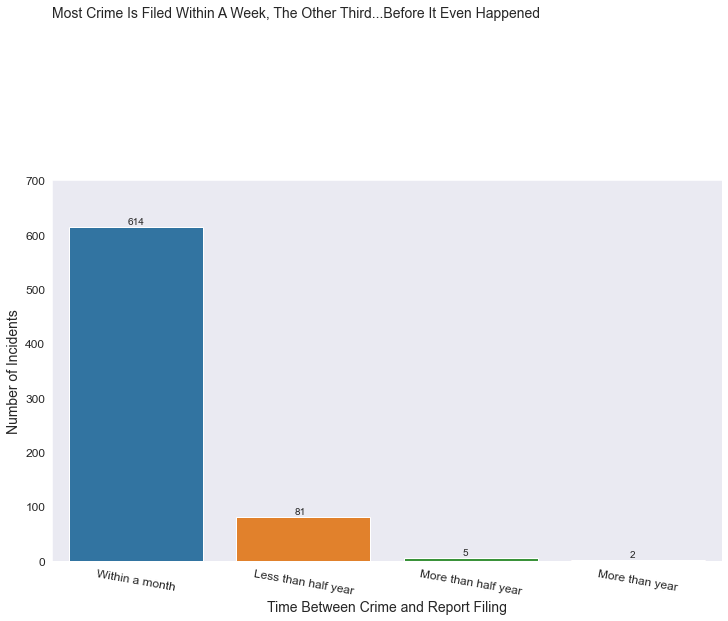

In [82]:
# duration_group.filing_method.value_counts().plot(kind="bar", figsize=(12, 7))
fig, ax = plt.subplots(figsize=(12, 7))
sns.countplot(data=duration_group, x="filing_method")

plt.xlabel("Time Between Crime and Report Filing", fontsize=14)
plt.ylabel("Number of Incidents", fontsize=14)
plt.xticks(fontsize=12, rotation=350)
plt.yticks(fontsize=12)
ax.text(-0.5, 1000, "Most Crime Is Filed Within A Week, The Other Third...Before It Even Happened", {"fontweight":"medium", "fontsize":14})

for p in ax.patches: 
    x = p.get_x() + p.get_width() - 0.45
    y = p.get_y() + p.get_height() + 5
    value = "{}".format(p.get_height())
    ax.text(x, y, value);

Other Visualizations - Precinct, MCPP, and General Crime Stats 

In [85]:
#What other series are we dealing with in the middle of the dataset? 
data.iloc[2, 7:14]

offense                                   Robbery
offense_code                                  120
precinct                                        N
sector                                          U
beat                                           U3
mcpp                            ROOSEVELT/RAVENNA
100_block_address    26TH AVE NE / NE BLAKELEY ST
Name: 2, dtype: object

In [86]:
data.mcpp.value_counts()[:5] # looks to be "neighborhood" or municipality where crime occurred 
# after additional research, MCPP stands for Micro-Community Policing Plans 
# MCPP allows SPD to tailor policing strategy by area/neighbourhood 

DOWNTOWN COMMERCIAL    78858
CAPITOL HILL           57820
NORTHGATE              53862
QUEEN ANNE             48024
SLU/CASCADE            41825
Name: mcpp, dtype: int64

In [87]:
data.precinct.value_counts() 
# there are very few where 'precinct' value is UKNOWN and fewer still as "NULL" or "OOJ" 

N          304809
W          257627
E          147249
S          134439
SW          93689
UNKNOWN      1435
OOJ             1
<Null>          1
Name: precinct, dtype: int64

Text(0.5, 1.0, 'Most Common Criminal Offenses in Seattle')

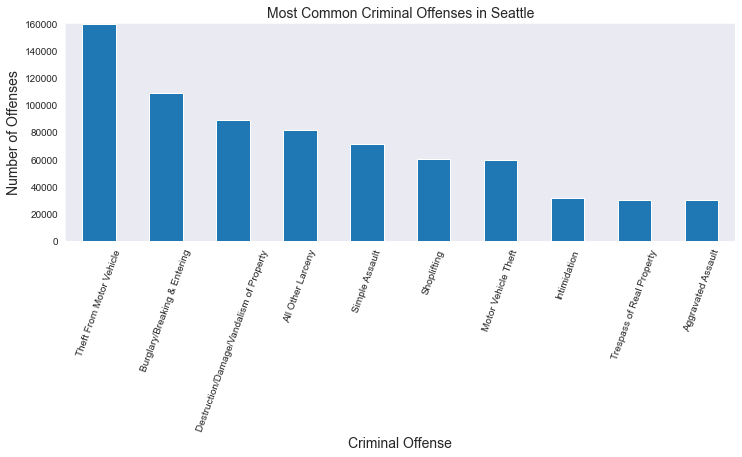

In [89]:
data.offense.value_counts()[:10].plot(kind="bar", figsize=(12, 4))
plt.xticks(rotation=70)
plt.xlabel("Criminal Offense", {"font":"Arial", "fontsize":14, "fontweight":"medium"})
plt.ylabel("Number of Offenses", {"font":"Arial", "fontsize":14, "fontweight":"medium"})
plt.title("Most Common Criminal Offenses in Seattle", fontsize=14)

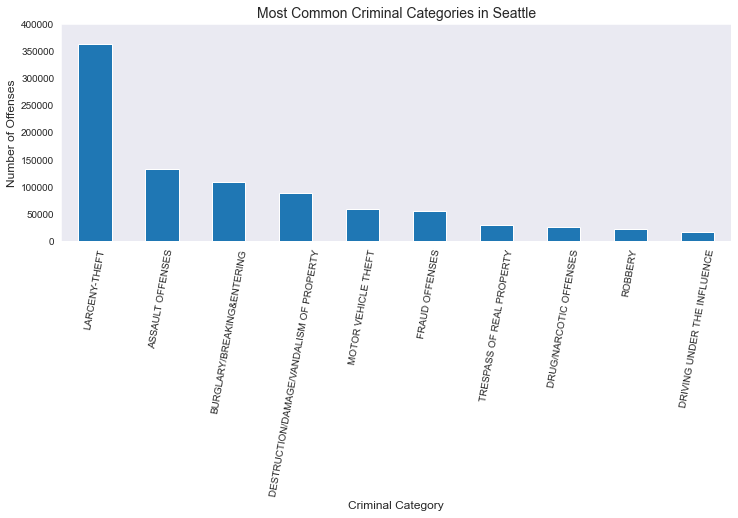

In [99]:
data.offense_parent_group.value_counts()[:10].plot(kind="bar", figsize=(12, 4)) 
plt.xticks(rotation=80)
plt.xlabel("Criminal Category", {"font":"Arial", "fontsize":12, "fontweight":"medium"})
plt.ylabel("Number of Offenses", {"font":"Arial", "fontsize":12, "fontweight":"medium"})
plt.title("Most Common Criminal Categories in Seattle", fontsize=14);

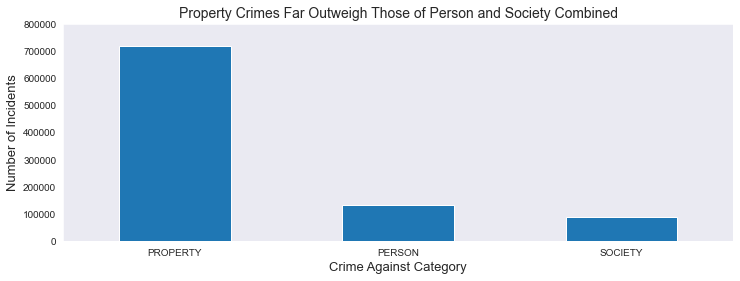

In [101]:
data.crime_against_category.value_counts().plot(kind="bar", figsize=(12, 4))
plt.xticks(rotation=0)
plt.xlabel("Crime Against Category", fontsize=13)
plt.ylabel("Number of Incidents", fontsize=13)
plt.title("Property Crimes Far Outweigh Those of Person and Society Combined", fontsize=14) ;

In [102]:
data.precinct.value_counts()

N          304809
W          257627
E          147249
S          134439
SW          93689
UNKNOWN      1435
OOJ             1
<Null>          1
Name: precinct, dtype: int64

In [106]:
data['precinct'] = data['precinct'].apply(lambda x: "UNKNOWN" if "ull" in x else x)
data['precinct'] = data['precinct'].apply(lambda x: "UNKNOWN" if "OOJ" in x else x)

In [107]:
data['precinct'].value_counts()

N          304809
W          257627
E          147249
S          134439
SW          93689
UNKNOWN      1437
Name: precinct, dtype: int64

In [110]:
data = data[~data["precinct"].str.contains("unknown", case=False)] # removing unkown precinct reports 

In [111]:
data['precinct'].value_counts()

N     304809
W     257627
E     147249
S     134439
SW     93689
Name: precinct, dtype: int64

In [112]:
#precinct  = geographically controlled/patroled area by police (can help with locations and cime trends)
mcpp_mapping = data.groupby(["mcpp", "offense_parent_group"])['offense'].count().reset_index()
mcpp_mapping = mcpp_mapping.sort_values("offense", ascending=False)[:30]

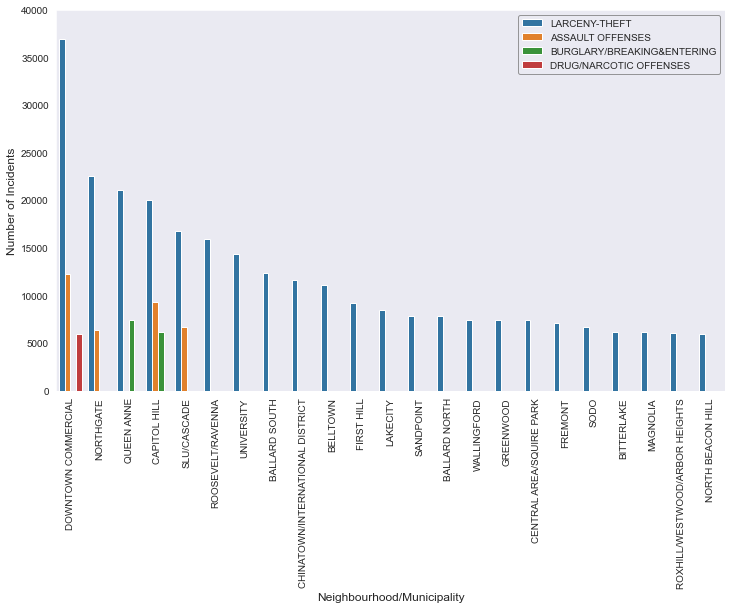

In [116]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(12, 7)) 

sns.barplot(data=mcpp_mapping, x="mcpp", y="offense", hue="offense_parent_group")

plt.ylabel("Number of Incidents", fontsize=12)
plt.xlabel("Neighbourhood/Municipality", fontsize=12)
plt.xticks(rotation=90)
plt.legend(loc="upper right", fancybox=True, edgecolor="gray");

#### Mapping criminal incidents with Folium 

In [ ]:
!pip install folium
import folium

In [118]:
folium_data = data[['offense_parent_group', 'latitude', 'longitude', 'offense_year']]

In [126]:
seattle_map = folium.Map(location=[folium_data.latitude.mean(), 
                           folium_data.longitude.mean()], 
                 zoom_start=14, min_zoom=2, control_scale=True)

In [127]:
seattle_map

In [121]:
folium_data.shape[0]

937813

In [130]:
data.head(2)

,report_number,offense_id,offense_start_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,...,offense_dow,offense_day_no,offense_year,offense_ampm,offense_24hr,street_address,DAY_OF_WEEK,MONTH_OF_YEAR,report_date,duration
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,...,Wednesday,2,2020,10:10:00 AM,10,3200 23RD AVE W,Wednesday,February,2020-02-05,0
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,...,Monday,0,2020,08:00:00 AM,8,6300 5TH AVE NE,Monday,February,2020-02-05,2


In [153]:
top_locations = data.groupby(['street_address']).size().to_frame("n_incidents").reset_index()
top_locations = top_locations.sort_values("n_incidents", ascending=False)[:25] #pulling top 25 addresses of incidents
top_locations.shape[0]

25

In [207]:
location_markers = data[['street_address', 'latitude', 'longitude']]
top_coordinates = pd.merge(top_locations, location_markers, on="street_address", how="inner")
top_coordinates['street_address'] = top_coordinates['street_address'].apply(lambda x: x.strip().replace("  ", " "))
top_coordinates.drop_duplicates(subset="street_address", inplace=True)

In [208]:
# top_coordinates[top_coordinates['n_incidents']==6080]
top_coordinates[top_coordinates['street_address'].str.contains("400 NE NORTHGATE WAY")]

,street_address,n_incidents,latitude,longitude
0,400 NE NORTHGATE WAY,6080,47.708603,-122.324615


In [289]:
seattle_map = folium.Map(location=[folium_data.latitude.mean(), 
                           folium_data.longitude.mean()], 
                 zoom_start=14, min_zoom=2, control_scale=True)

In [290]:
seattle_map

In [291]:
for idx, location_info in top_coordinates.iterrows(): 
    folium.Marker([location_info["latitude"], 
                  location_info["longitude"]], tooltip=str(location_info['n_incidents']) +" Arrests", popup=location_info["street_address"] +":\n\n" + str(location_info['n_incidents']) +" Arrests").add_to(seattle_map)

In [262]:
# could also refactor above loop into a function if we needed to continue using it but will leave as is

# def plotDot(point):
#     '''input: series that contains a numeric named latitude and a numeric named longitude
#     this function creates a CircleMarker and adds it to your this_map'''
#     folium.Marker(location=[point.latitude, point.longitude],
#                         radius=2,
#                         weight=5).add_to(seattle_map)


In [292]:
seattle_map

In [275]:
from folium import plugins
from folium.plugins import HeatMap

In [293]:
heat_map_coords = folium.Map(location=[folium_data.latitude.mean(), 
                           folium_data.longitude.mean()], 
                 zoom_start=14, min_zoom=2, control_scale=True)

In [295]:
heat_data = [[row['latitude'],row['longitude']] for index, row in top_coordinates.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(heat_map_coords)

# Display the map
heat_map_coords

/

#### Formatting copy of cleaned data for Tableau dashboard / further visualization 

In [ ]:
# I'm thinking that after cleaning up the data and asking some initial questions, 
# it'll be better to explore location data thoroughly in Tableau; can remove any unnecessary columns before saving 

In [296]:
seattle_crime_tableau = data.copy()

In [297]:
seattle_crime_tableau.drop(columns=["offense_id", "100_block_address", "report_number"], inplace=True)

In [298]:
seattle_crime_tableau.to_csv("seattle_criminal_database_cleaned.csv", index=False)